In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import accuracy_score,cohen_kappa_score, f1_score
import time

In [3]:
# loading the raw data
bc=pd.read_csv("data.csv")
bc.head()  
P=bc.iloc[:,2:32]



In [4]:
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
y.head()


0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [6]:
# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())


(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.960255820189289


In [7]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=bc.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.values]),columns=n)

In [8]:
from sklearn.model_selection import train_test_split
#predictor X
X=(Xy.iloc[:,0:11]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.naive_bayes import GaussianNB

NB_sk = GaussianNB()
t0=time.time()
NB_sk.fit(X_train, y_train)
train=round(time.time()-t0,3)
t1=time.time()
sk_pred = NB_sk.predict(X_test)
pred=round(time.time()-t1,3)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Naive Bayes:
confusion matrix
 [[88  2]
 [ 7 46]] 


Confusion matrix plot of Naive Bayes


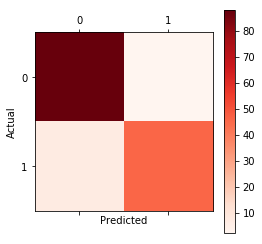


 Classification report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        90
           1       0.96      0.87      0.91        53

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [33]:
c_m = confusion_matrix(y_test, sk_pred)
print('Naive Bayes:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Naive Bayes')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, sk_pred))

In [14]:
#import metrics for evaluation

from sklearn.metrics import accuracy_score,cohen_kappa_score, f1_score, recall_score, precision_score

#use builtin functions or use confustion matrix

#[row, column] from confustion matrix
# TP - True positive, TN - True Negative, FP - False Positive, FN - False Negative

TP = c_m[1, 1]
TN = c_m[0, 0]
FP = c_m[0, 1]
FN = c_m[1, 0]

In [15]:
cohen_kappa_score(y_test, sk_pred, labels=None, weights=None, sample_weight=None)

0.8624265098877606

In [16]:
prediction=sk_pred

In [17]:
f1_score(y_test, prediction)

0.910891089108911

In [18]:
#accuracy score - 2 ways (1- using metrics functions or 2-using confusion matrix)

print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, prediction))

0.9370629370629371
0.9370629370629371


In [19]:
#classification error - 2 ways

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, prediction))

0.06293706293706294
0.06293706293706292


In [20]:
#sensitivity - 2 ways

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, prediction))

0.8679245283018868
0.8679245283018868


In [21]:
#specificity

specificity = TN / (TN + FP)
print(specificity)

0.9777777777777777


In [24]:
#precision

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, prediction))

0.9583333333333334
0.9583333333333334


In [23]:
#false positive rate

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.022222222222222223
0.022222222222222254


In [36]:
print("Train", train, "pred", pred)

Train 0.009 pred 0.002
